# CS-5824 / Advanced Machine Learning
# Assignment 1 Section B [ 40 Points ]

In this assignment, **you need to complete three sections** which are based on:

1. Logistic regression
2. MLE
3. Evaluation

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload **both** the PDF file and this notebook.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: 

# Section 0. Environment Set Up

In [ ]:

!pip install scipy==1.1.0 Pillow==4.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 37.7 MB/s 
     |████████████████████████████████| 13.9 MB 21.3 MB/s 
     |████████████████████████████████| 112 kB 41.1 MB/s 
  Created wheel for Pillow: filename=Pillow-4.3.0-cp37-cp37m-linux_x86_64.whl size=1064626 sha256=65bbb2cc06e97ed06967e4f245c7f350dc7dcaba899c4547f3fd4549fd3d9b77
  Stored in directory: /root/.cache/pip/wheels/77/77/72/045aa57329073d3cdbd822995f8228c95d17cce12f1ca75f8f
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=509718be8edce02c8fde829f58f487a9d66ddc279d055f8c7127b511cf81d4e1
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built Pillow olefile
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attemptin

Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Append the directory to your python path using sys

In [ ]:
import sys
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'HW1/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

Run some setup code for this notebook.

In [ ]:
from __future__ import print_function
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Section 1. Logistic Regression [ 18 points ]

In this problem, we’ll apply logistic regression to a data set of spam email. 
This data consists of 4601 email messages, from which 57 features have been extracted. These are as follows:
- 48 features in [0, 100], giving the percentage of words in a given message which match a given
word on a list containing, e.g., “business”, “free”, etc.
- 6 features in [0, 100], giving the percentage of characters in the email that match characters on a
list containing, e.g., “$”, “#”, etc.
- Feature 55: The average length of an uninterrupted sequence of capital letters.
- Feature 56: The length of the longest uninterrupted sequence of capital letters.
- Feature 57: The sum of the lengths of uninterrupted sequences of capital letters.


There are files spam.train.dat and spam.test.dat (provided in the assignment files) in which
each row is an email. There are 3000 training and 1601 test examples. The final column in each file
indicates whether the email was spam.

The files can be loaded using the block of code below. You will answer the following questions using the data provided. 

In [ ]:
prefix = "/content/gdrive/My Drive/"
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = "HW1/"
train_path = prefix + customized_path_to_your_homework + "data/spam.train.dat"


train_set = np.genfromtxt(train_path)

test_path = prefix + customized_path_to_your_homework + "data/spam.test.dat"
test_set = np.genfromtxt(test_path)

#split this into features 
train_set_features = train_set[:,:-1]
test_set_features = test_set[:,:-1]

train_set_output = train_set[:, 57]
test_set_output = test_set[:, 57]


### Question 1. [ 3 points ]

Build a Logistic Regression model to classify whether an email is spam or not using the *spam* data set. Report your training and test performance.

In [ ]:
#Build your model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

spam_X_train, spam_X_test, spam_y_train,spam_y_test = train_test_split(train_set_features,train_set_output, test_size=0.2, shuffle=True, stratify=train_set_output, random_state=42)

spam_X_train = scaler.fit_transform(spam_X_train)
spam_X_test = scaler.fit_transform(spam_X_test)
test_set_features = scaler.fit_transform(test_set_features)


log_reg = LogisticRegression()

model = log_reg.fit(spam_X_train, spam_y_train)



In [ ]:
#Report training and test performance here
print(f"Accuracy of training: {log_reg.score(spam_X_test, spam_y_test)}")
print(f"Accuracy of test: {log_reg.score(test_set_features, test_set_output)}")

Accuracy of training: 0.9233333333333333
Accuracy of test: 0.9175515302935665


### Question 2. [ 3 points ]

Plot the learning curve for this model. What is the Bias/Variance trade-off for this model ?

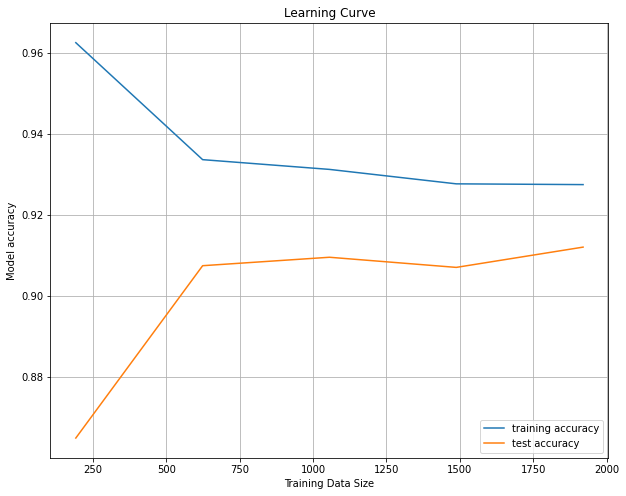

In [ ]:
#Plot the learning curve
from sklearn.model_selection import learning_curve

#to get learning curve could try plotting mean squared error?


train_sizes, train_scores, test_scores = learning_curve(model,spam_X_train,spam_y_train, cv = 5)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label = "training accuracy") 
plt.plot(train_sizes,np.mean(test_scores,axis=1), label = "test accuracy")

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()





In [ ]:
#Comment on the Bias/Variance trade-off 
"""This seems to be a relatively weel fit model as it doesn't seem to be overfit. There is a possibility one could argue that it is underfit, but it looks to be
relatively well fit. This means that we don't have high bias or high variance for this model. If the model is underfit then it would be a high bias model with low
variance"""

"This seems to be a relatively weel fit model as it doesn't seem to be overfit. There is a possibility one could argue that it is underfit, but it looks to be\nrelatively well fit. This means that we don't have high bias or high variance for this model. If the model is underfit then it would be a high bias model with low\nvariance"

### Question 3. [ 3 points ]

Apply L2-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [ ]:
#Apply L2-regularized logistic regression

#built the logistic regression model using the built in logisitc regression, setting the penalty to l2 and set c to 1 to have stronger regularization since the
#training data is relatively accurate
lr2 = LogisticRegression(C=1, penalty='l2', tol=0.01)
#fit the data
lr2.fit(spam_X_train, spam_y_train)
#get the scores
print('L2: Accuracy on the training subset: {:.3f}'.format(lr2.score(spam_X_train, spam_y_train)))
print('L2: Accuracy on the test subset: {:.3f}'.format(lr2.score(spam_X_test, spam_y_test)))



L2: Accuracy on the training subset: 0.927
L2: Accuracy on the test subset: 0.923


In [ ]:
#Perform cross-validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#perform  10 fold cross validation

kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)

#get the scores using the lr2 model as input
scores = cross_val_score(lr2, spam_X_train, spam_y_train, scoring="accuracy", cv=kfold_cv)
scores_test = cross_val_score(lr2, test_set_features, test_set_output, scoring="accuracy", cv=kfold_cv)





In [ ]:
#Report your procedure and training and test performance
""""Built the model using logistic regression setting the penalty to l2 and then used a low c value for higher regualarzation. I then fit the data
based off this model and then compared to training and test results. I then performed 10 fold cross validation and got the scores for this results 
using cross validation and the lr2 model that I built."""

print(f"Mean training accuracy: {np.mean(scores)}")
print(f"Training standard deviation: {np.std(scores)}")\

print(f"Mean test accuracy: {np.mean(scores_test)}")
print(f"Test standard deviation: {np.std(scores_test)}")\


Mean training accuracy: 0.9179166666666667
Training standard deviation: 0.02429920551970555
Mean test accuracy: 0.919417701863354
Test standard deviation: 0.02570595661119934


### Question 4. [ 3 points ]

Apply L1-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [ ]:
#Apply L1-regularized logistic regression

#built the logistic regression model using the built in logisitc regression, setting the penalty to l1 and set c to 1 to have better fit since training data is accurate
lr1 = LogisticRegression(C=1, penalty='l1', tol=0.01, solver='liblinear')
#fit the data
lr1.fit(spam_X_train, spam_y_train)
#get the scores
print('L1: Accuracy on the training subset: {:.3f}'.format(lr1.score(spam_X_train, spam_y_train)))
print('L1: Accuracy on the test subset: {:.3f}'.format(lr1.score(spam_X_test, spam_y_test)))



L1: Accuracy on the training subset: 0.925
L1: Accuracy on the test subset: 0.927


In [ ]:
#Perform cross-validation 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#perform  10 fold cross validation
kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)

#get the scores using the lr1 model as input
scores = cross_val_score(lr1, spam_X_train, spam_y_train, scoring="accuracy", cv=kfold_cv)
scores_test = cross_val_score(lr1, test_set_features, test_set_output, scoring="accuracy", cv=kfold_cv)



In [ ]:
#Report your procedure and training and test performance

""""Built the model using logistic regression setting the penalty to l1 and then used a low c=1 for better fit. I then fit the data
based off this model and then compared to training and test results. I then performed 10 fold cross validation and got the scores for this results 
using cross validation and the lr1 model that I built."""

print(f"Mean training accuracy: {np.mean(scores)}")
print(f"Training standard deviation: {np.std(scores)}")\

print(f"Mean test accuracy: {np.mean(scores_test)}")
print(f"Test standard deviation: {np.std(scores_test)}")\

Mean training accuracy: 0.9166666666666667
Training standard deviation: 0.023422448870925306
Mean test accuracy: 0.917542701863354
Test standard deviation: 0.027663210447893445


### Question 5. [ 3 points ]

What are the advantages and disadvantages of the two models with repect to this problem? For example, have there been a lot of sparceness in the model, or what kind of features have been removed?

In [ ]:
# Advantages and disadvantages of the two models 
"""The L1 regression will lead to a relatively sparse model since it will drive some of the coefficents of the features to 0. Whereas L2 tends to have a more full 
model. In this case the L1 models tend to have higher accuracy as they perhaps filter out some fo the noise, but the L2 model does have a lower standard
deviation for the test data. It seems because we have a large number of features that having a sparser model helps filter out some of the noise and lead to a better
model compared to trying to account for everything more fully as in L2. """

'The L1 regression will lead to a relatively sparse model since it will drive some of the coefficents of the features to 0. Whereas L2 tends to have a more full \nmodel. In this case the L1 models tend to have higher accuracy as they perhaps filter out some fo the noise, but the L2 model does have a lower standard\ndeviation for the test data. It seems because we have a large number of features that having a sparser model helps filter out some of the noise and lead to a better\nmodel compared to trying to account for everything more fully as in L2. '

### Question 6. [3 points]

Transform the features with the basis function of your choice. Retrain the two models above and report the model performances. Why did you choose this basis function ?

In [ ]:
# Advantages and disadvantages of the two models 
"""See above"""

'See above'

In [ ]:
#Retrain the two models above 


#I have used the gaussian function presented in the workshop for this problem provided by the TA. I have then utilized this function for my specific data 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

class GaussianBasis(BaseEstimator, TransformerMixin):
    def __init__(self, basis_functions):
        self.basis_functions = basis_functions 
    
    @staticmethod
    def _gaussian_basis(spam_X_gaussian, center, scale, axis=None):
        return np.exp(-0.5 * np.sum((spam_X_gaussian - center) / scale) ** 2, axis))
        
    def fit(self, spam_X_gaussian, y=None):
        self.centers = np.linspace(X.min(), spam_X_gaussian.max(), self.basis_functions) 
        self.scale = self.centers[1] - self.centers[0] 
        return self
        
    def transform(self, spam_X_gaussian):
        return self._gaussian_basis(spam_X_gaussian[:, :, np.newaxis], self.centers, self.scale, axis=1)


from sklearn.pipeline import make_pipeline

gaussian_model = make_pipeline(GaussianBasis(20), Ridge())
gaussian_model.fit(spam_X_train, spam_y_train)

# Unsorted for MSE evaluation
spam_y_pred = gaussian_model.predict(spam_X_test)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#perform  10 fold cross validation
kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)

#get the scores using the lr2 model as input
scores_l2 = cross_val_score(lr2, spam_X_train, spam_y_train, scoring="accuracy", cv=kfold_cv)
scores_test_l2 = cross_val_score(lr2, test_set_features, test_set_output, scoring="accuracy", cv=kfold_cv)


#perform  10 fold cross validation
kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)

#get the scores using the lr1 model as input
scores_l1 = cross_val_score(lr1, spam_X_train, spam_y_train, scoring="accuracy", cv=kfold_cv)
scores_test_l1 = cross_val_score(lr1, test_set_features, test_set_output, scoring="accuracy", cv=kfold_cv)



In [ ]:
#Report the model performances
print(f"Mean squared error: {mean_squared_error(spam_y_test, spam_y_pred)}")

print(f"L2 Mean training accuracy: {np.mean(scores_l2)}")

print(f"L2 Mean test accuracy: {np.mean(scores_test_l2)}")

print(f"L1 Mean training accuracy: {np.mean(scores_l1)}")

print(f"L1 Mean test accuracy: {np.mean(scores_test_l1)}")

#maybe check this

Mean squared error: 0.23326326609902864
L2 Mean training accuracy: 0.9179166666666667
L2 Mean test accuracy: 0.919417701863354
L1 Mean training accuracy: 0.9158333333333333
L1 Mean test accuracy: 0.9175388198757763


In [ ]:
#Why choosing this basis function?
"""I chose a gaussian basis function (that was provided by the TA from the workshop because I wanted to see how it would perform with this data. Frankly, I thought it would perform worse than it did.
Since this data felt like it could be somewhat scattered, it may have been tough for the model to classify. But I think it actually did quite well because
we have an output that is just 1 or 0 and not a range of outputs that could make this perform worse."""

'I chose a gaussian basis function (that was provided by the TA from the workshop because I wanted to see how it would perform with this data. Frankly, I thought it would perform worse than it did.\nSince this data felt like it could be somewhat scattered, it may have been tough for the model to classify. But I think it actually did quite well because\nwe have an output that is just 1 or 0 and not a range of outputs that could make this perform worse.'

# Section 2. MLE [15 pts]

For the following problems, we will a collaborative filtering data set. These data
are originally from http://eigentaste.berkeley.edu/dataset/, however, they have been altered somewhat for this HW, so you should use the files directly shared from us. These problems will only examine the marginal distribution of the ratings themselves. Assuming that the data set is in your homework path on google drive, the ratings can be loaded into your collab session using the block of code in the next cell. This will give you a 1761439 × 3 matrix of doubles. Right now we only care about the ratings, which are the third column. You’ll be asked to produce figures. Include these figures in your notebook.

In [ ]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'HW1/'
data_path = prefix + customized_path_to_your_homework + 'data/jester_ratings.dat'
data = np.genfromtxt(data_path)
data

array([[ 1.000000e+00,  5.000000e+00,  2.275770e-01],
       [ 1.000000e+00,  7.000000e+00, -9.279702e+00],
       [ 1.000000e+00,  8.000000e+00, -9.267760e+00],
       ...,
       [ 6.397800e+04,  1.240000e+02, -9.022733e+00],
       [ 6.397800e+04,  5.800000e+01, -8.644745e+00],
       [ 6.397800e+04,  4.400000e+01, -8.445059e+00]])

### Question 1. [ 5 points ]

Generate a set of normalized histograms (histograms which have an area of one) of the ratings and
qualitatively describe the empirical distributions that you see. Try several different bin sizes and explain your choices. Are the resulting density estimates uni- or multi-modal? Where do the peaks
appear to be? Do these answers change as you vary the number of bins?

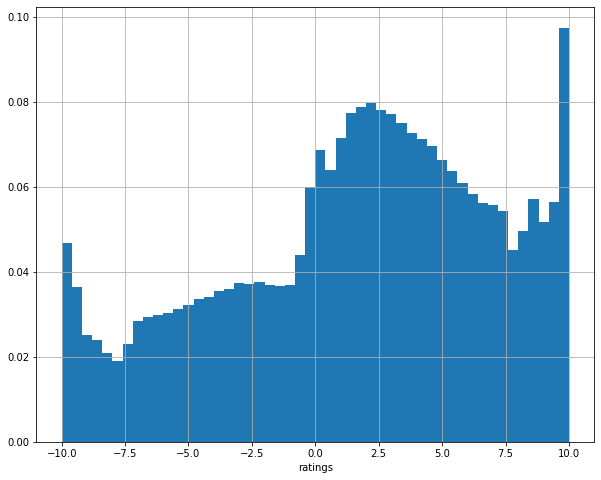

'It seems there is a large spike towards the very end of the data, when the rating is close to 10. There is also a similar smaller spike towards the other end\nof the histogram when the rating is -10. There is also a huge chunk of data from about -.25 to 2.5 that slowly trends downward until we reach 7.5 There\nis also a spike in the data around -.25 that it never then goes below again.\n\nWith different bin sizes, we actually see the spike at 10 become more substantial and same with the small spike around -10. Outside of that, it becomes more\nclear there is a general trend that the amount of data increases in each bin as we increase the rating generally.\n\nThis is a multi-modal density estimate at 10 and roughly 2.5. Depending on what bin size you set, you could make an argument for uni-modal density estimate if \nyou are using a very large amount of bins. But I would say that mutli-modal is the best choice.\n\nThe peaks are generally around 2.5 and 10 in most cases. 10 becomes more

In [ ]:
# Your answer here (code, histogram, response to questions)
#https://datatofish.com/numpy-array-to-pandas-dataframe/

import pandas as pd

df = pd.DataFrame(data, columns = ['Column_A','Column_B','ratings'])

df["ratings"].hist(bins=50, density = True)
plt.xlabel("ratings")
plt.show()

"""It seems there is a large spike towards the very end of the data, when the rating is close to 10. There is also a similar smaller spike towards the other end
of the histogram when the rating is -10. There is also a huge chunk of data from about -.25 to 2.5 that slowly trends downward until we reach 7.5 There
is also a spike in the data around -.25 that it never then goes below again.

With different bin sizes, we actually see the spike at 10 become more substantial and same with the small spike around -10. Outside of that, it becomes more
clear there is a general trend that the amount of data increases in each bin as we increase the rating generally.

This is a multi-modal density estimate at 10 and roughly 2.5. Depending on what bin size you set, you could make an argument for uni-modal density estimate if 
you are using a very large amount of bins. But I would say that mutli-modal is the best choice.

The peaks are generally around 2.5 and 10 in most cases. 10 becomes more promiment as we increase bin size. -10 is a localized peak. """




### Question 2. [ 5 points ]

Perform a maximum-likelihood fit of a Gaussian distribution to the ratings and report the mean and
variance. Overlay the MLE Gaussian fit on top of the normalized histogram. Is it a good fit or a bad fit
and why?



In [ ]:
#https://stats.stackexchange.com/questions/504004/how-do-we-code-a-maximum-likelihood-fitting-for-a-simple-gaussian-data

## pick some x-values and compute true log PDF
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def gaussian(params):
    mean = params[0]   
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(df["ratings"], loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')






In [ ]:
# Report mean and variance
print("The mean is: ", results.x[0])
print("The variance is: ", results.x[1]*results.x[1])

The mean is:  1.6186007041726516
The variance is:  28.117319037793557


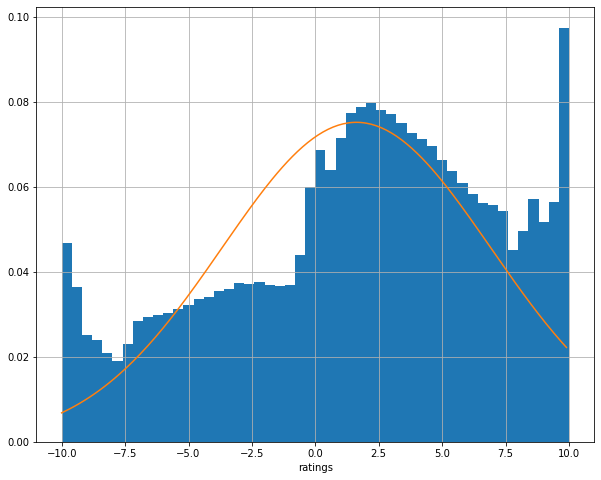

In [ ]:
# Overlay two histograms
from scipy.stats import norm
df["ratings"].hist(bins=50, density = True)
x_axis = np.arange(-10, 10, .1)
plt.plot(x_axis, norm.pdf(x_axis, results.x[0], results.x[1]))
plt.xlabel("ratings")
plt.show()


In [ ]:
# Explain model fit
"""The model fits well enough but not perfect. The spike towards 10 shows up in the gaussian curve as it doesn't go as low as it does on the other side. The 
peak matches up roughly with where the peak in the actual measurements are and the trends in the data roughly match the curve/fit. Overall it is not perfect but
reasonable enough"""

"The model fits well enough but not perfect. The spike towards 10 shows up in the gaussian curve as it doesn't go as low as it does on the other side. The \npeak matches up roughly with where the peak in the actual measurements are and the trends in the data roughly match the curve/fit. Overall it is not perfect but\nreasonable enough"

### Question 3. [ 5 points ]

Randomly partition the data into ten disjoint sets (called folds) of approximately the same size. We will use these partitions to assess the generalization performance of these MLE fits. This is done by creating ten experiments where one fold is taken to be a “test” set and the remaining nine are together considered to be the “training” set. A model is fit on the training data and asked to make predictions of the test set. For a given model, this produces ten log probability numbers that reflect how well the model generalized to the unseen data. If the folds are of different size, the predictive log probabilities can be turned into “averages” by dividing the overall logprob by the number of test cases. Perform this procedure for your Gaussian histogram density estimators from Problem 1 and 2. That is, fit this model ten times on 9/10ths of the data and ask it to make predictions of the remaining 1/10th. To visualize the results, produce a boxplot of the average log probabilities.

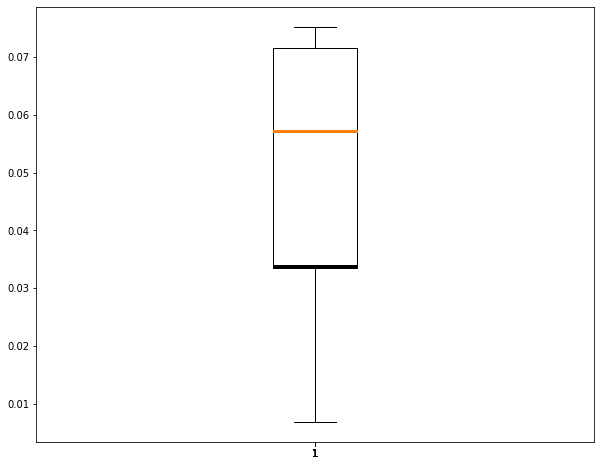

In [ ]:
# Perform 10-fold cross validation
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian(params):
    mean = params[0]   
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(df["ratings"][train_index], loc=mean, scale=sd))

    return nll


initParams = [1, 1]


from sklearn.model_selection import KFold
kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)
count =0
for index, (train_index, val_index) in enumerate(kfold_cv.split(df["ratings"])):
  results = minimize(gaussian, initParams, method='Nelder-Mead')
  norms = norm.pdf(df["ratings"][val_index], results.x[0], results.x[1])
  plt.boxplot(norms, notch=None, vert=None, patch_artist=None, widths=None)


In [ ]:
# Visualize results

"""Please see above"""


'Please see above'

## Section 3. Evaluation Questions  [7 points ]

1. Suppose we fit a linear model to a polynomial data. Is this model a good fit? If not, is it underfitting or overfitting? [ 2 points ]


In [ ]:
# Your answer here
"""It is not a good model fit this a linear model will not capture the polynomial growth of the data overtime leading to bad error. If the model is over a very
small range, such as 150 to 151 on the y-axis, then this could be a very good model fit since even though the data is polynomial, the range is so small
that the data is very close to linear. If this is a bad model it will be underfit whereas a cubic function would be overfit."""

'It is not a good model fit this a linear model will not capture the polynomial growth of the data overtime leading to bad error. If the model is over a very\nsmall range, such as 150 to 151 on the y-axis, then this could be a very good model fit since even though the data is polynomial, the range is so small\nthat the data is very close to linear. If this is a bad model it will be underfit whereas a cubic function would be overfit.'

2.  How does cross validation address the problem of overfitting? Does it only identify (or detect) overfitting? Does it also eliminate (or at least reduce) overfitting? Explain
your answers. [2.5 points ]


In [ ]:
# Your answer here
"""Cross validation helps by splitting up the data into multiple different subsets and excluding a portion of the data that acts as the test set. 
It then creates many different models and averages the results of these models together. This helps reduce overfitting because it helps averages out models
to create a better model that doesn't factor in noise or outliers as much that can lead to overfitting. This does reduce overfitting but it cannot 
eliminate it entirely, because if there is a lot of outliers or noise, it will not completely solve the problem. Additionally, in smaller datasets it is more
likely to let us down as the noise is more prevelant."""

"Cross validation helps by splitting up the data into multiple different subsets and excluding a portion of the data that acts as the test set. \nIt then creates many different models and averages the results of these models together. This helps reduce overfitting because it helps averages out models\nto create a better model that doesn't factor in noise or outliers as much that can lead to overfitting. This does reduce overfitting but it cannot \neliminate it entirely, because if there is a lot of outliers or noise, it will not completely solve the problem. Additionally, in smaller datasets it is more\nlikely to let us down as the noise is more prevelant."

3. Suppose you are given a dataset { (𝑥<sub>1</sub>, 𝑦<sub>1</sub>), (𝑥<sub>2</sub>, 𝑦<sub>2</sub>), ⋯ , (𝑥<sub>m</sub>, 𝑦<sub>m</sub>) } and you are asked to perform **5-fold cross-validation** for selecting the value of 𝜆 for $𝐿_2$ regularization for a regularized linear regression. Please describe the procedure of how you would select the value 𝜆. [2.5 points ]

In [ ]:
# Your answer here
# reference: https://stats.stackexchange.com/questions/153744/how-to-use-cross-validation-with-regularization
""""We should first discretize lambda.
We then calculate the cross-validation error for our model when using each value of lambda 
We then choose the lambda that gave us the least cross-validation error. """

'"We should first discretize lambda.\nWe then calculate the cross-validation error for our model when using each value of lambda \nWe then choose the lambda that gave us the least cross-validation error. '